In [2]:
from Optimisation import *
from cpclasses.PlotTools import *

In [3]:
class CP(Potential):

    def __init__(self, x0, x1, A, B, x_range, k = 1):
        self.k = k
        self.x0 = x0
        self.x1 = x1
        self.A = A
        self.B = B
        self.x_range = x_range

    def V(self, x):
        return 1/2 * self.k * (x - self.x0)**2 + self.A * np.exp(- (x-self.x1)**2 / self.B**2) 

    def force(self, x):
        return - self.k * (x - self.x0) + 2 * self.A * (x - self.x1) / self.B**2 * np.exp(- (x-self.x1)**2 / self.B**2)

    def plot_V(self, ax):
        x = np.linspace(self.x_range[0], self.x_range[1], 100)
        ax.plot(x, self.V(x), label=r'$E_{pot}(x)$')

    def E_pot_numeric(self, x):
        first_term = self.V(self.x0)
        #Integrate the force:
        second_term = quad(self.force, self.x0, x)[0]
        return first_term - second_term
        

Text(0, 0.5, 'V(x)')

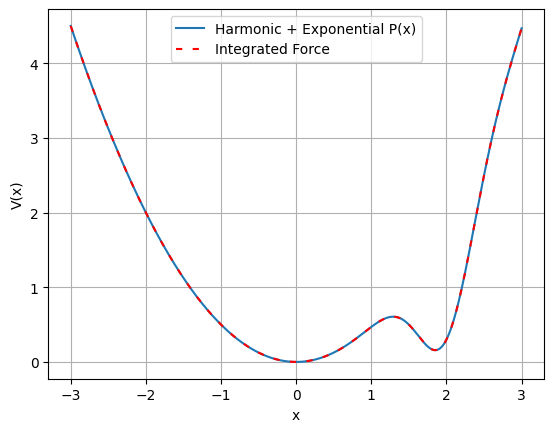

In [4]:


Cust_Pot = CustomPotential(x0 = 0, x1 = 2, A = -1.7, B = 1/2, x_range=[-3,3])

fig, ax = plt.subplots()
Cust_Pot.plot_V(ax)


xs = np.linspace(-3,3,1000)
E_pots = [Cust_Pot.E_pot_numeric(x) for x in xs]
#Spread the lines out a bit:
ax.plot(xs, E_pots, label='Integrated Force', color='red', ls = '--', dashes = (3,5))
ax.legend()
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('V(x)')
#plt.savefig('Figures/CustomPotential.png')


kT = 0.05:
Accepted 12782 out of 100000 samples: 12.8% acceptance rate
Heat capacity for Harmonic + Exponential potential:
Direct integration: 0.0271
Fluctuations: 0.633
Numerical derivative: 0.635
Monte Carlo: 0.0335
V_avg_direct = 0.027092483378565704
V_avg_MC = 0.03348818090248672


kT = 0.15:
Accepted 16577 out of 100000 samples: 16.6% acceptance rate
Heat capacity for Harmonic + Exponential potential:
Direct integration: 0.0937
Fluctuations: 0.629
Numerical derivative: 0.628
Monte Carlo: 0.0925
V_avg_direct = 0.09367314354421041
V_avg_MC = 0.09249588170945972


kT = 0.25:
Accepted 16735 out of 100000 samples: 16.7% acceptance rate
Heat capacity for Harmonic + Exponential potential:
Direct integration: 0.149
Fluctuations: 0.484
Numerical derivative: 0.483
Monte Carlo: 0.152
V_avg_direct = 0.14899677522389396
V_avg_MC = 0.15233621726712085


kT = 0.35:
Accepted 16538 out of 100000 samples: 16.5% acceptance rate
Heat capacity for Harmonic + Exponential potential:
Direct integration: 

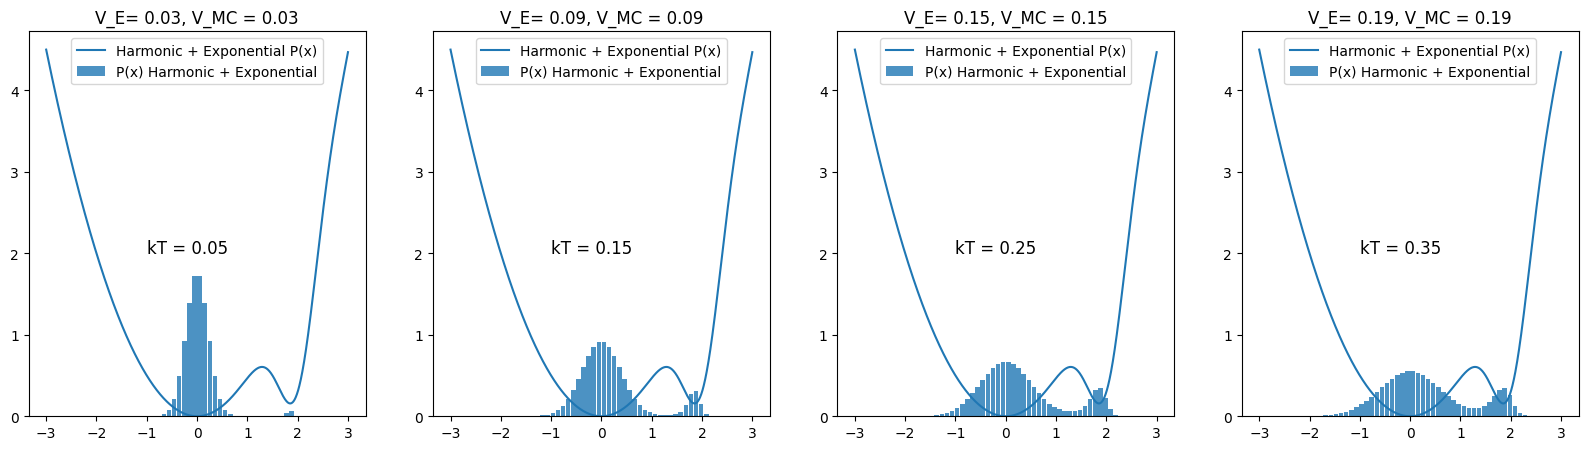

In [5]:
# Metropolis Monte Carlo

# Direct integration and Metropolis Monte Carlo to evaluate the thermally averaged potential energy

kTs = [0.05, 0.15, 0.25, 0.35]



Custom_Potentials = [CustomPotential(x0 = 0, x1 = 2, A = -1.7, B = 1/2, x_range=[-3,3], kT = kT, N_bins=60) for kT in kTs]

fig, axs = plt.subplots(1,4, figsize = (20,5))

for potential, ax, kT in zip(Custom_Potentials, axs, kTs):
    potential.plot_V(ax)
    potential.plot_P(ax)
    print(f'kT = {kT}:')
    V_avg_direct, _,_, V_avg_MC = potential.thermodynamics()
    print(f'V_avg_direct = {V_avg_direct}')
    print(f'V_avg_MC = {V_avg_MC}')
    print('\n')
    ax.text(-1, 2, f'kT = {kT}', fontsize=12)
    ax.set_title(f'V_E= {V_avg_direct:.2f}, V_MC = {V_avg_MC:.2f}')


plt.savefig('Figures/CustomPotential, Varying T.png')

kT = 0.05:
kT = 0.15:
kT = 0.25:
kT = 0.35:


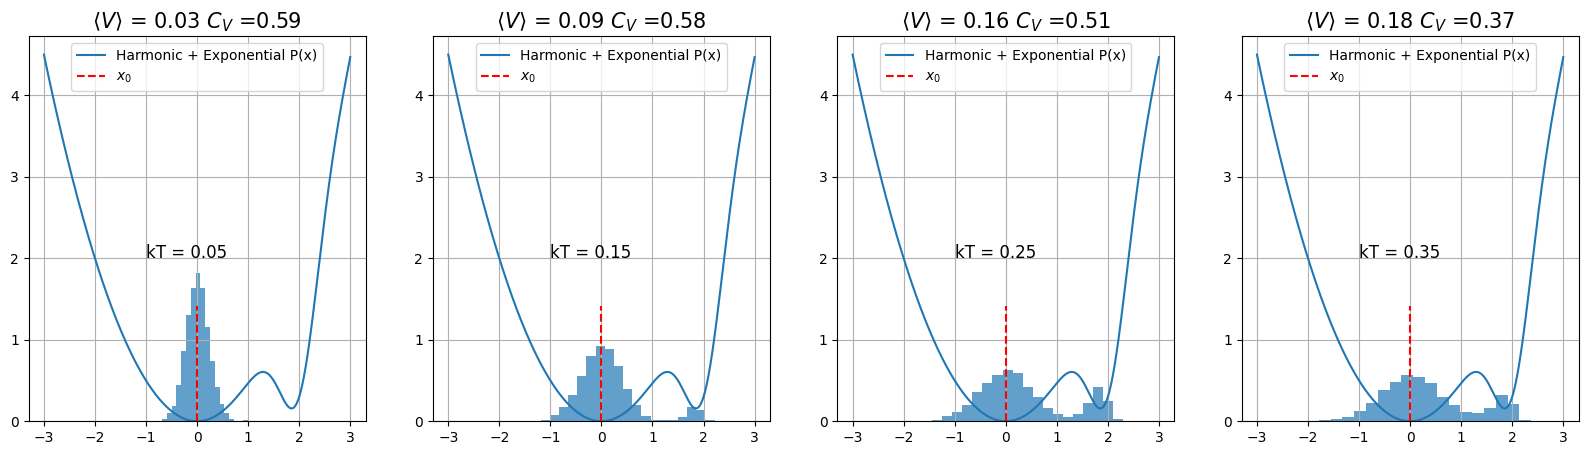

In [6]:
# Metropolis Monte Carlo

# Direct integration and Metropolis Monte Carlo to evaluate the thermally averaged potential energy

kTs = [0.05, 0.15, 0.25, 0.35]



Custom_Potentials = [CustomPotential(x0 = 0, x1 = 2, A = -1.7, B = 1/2, x_range=[-3,3], kT = kT, N_bins=60) for kT in kTs]

fig, axs = plt.subplots(1,4, figsize = (20,5))

for potential, ax, kT in zip(Custom_Potentials, axs, kTs):
    potential.plot_V(ax)
    #potential.plot_P(ax)
    print(f'kT = {kT}:')
    ax.axvline(0, ymax=0.3, color='red', ls='--', label=r'$x_0$')
    xs, V_avg, C_V = potential.constant_temp_MD_1d(x0 = 0, N = 10000, m=1, dt=0.01)
    hist, bins = np.histogram(xs, bins=20, density=True)
    bin_centers = (bins[:-1] + bins[1:])/2
    bar_width = bins[1] - bins[0]
    ax.bar(bin_centers, hist, width = bar_width, alpha=0.7)
    ax.set_title(r'$\langle V \rangle$ = ' + f'{V_avg:.2f} ' + r'$C_V$ =' +f'{C_V:.2f}', fontsize=15)
    ax.text(-1, 2, f'kT = {kT}', fontsize=12)
    ax.grid()
    ax.legend()
    
    


save_plot(fig,'CustomPotential, Varying T, MD, x = x0.png')

kT = 0.05:
kT = 0.15:
kT = 0.25:
kT = 0.35:


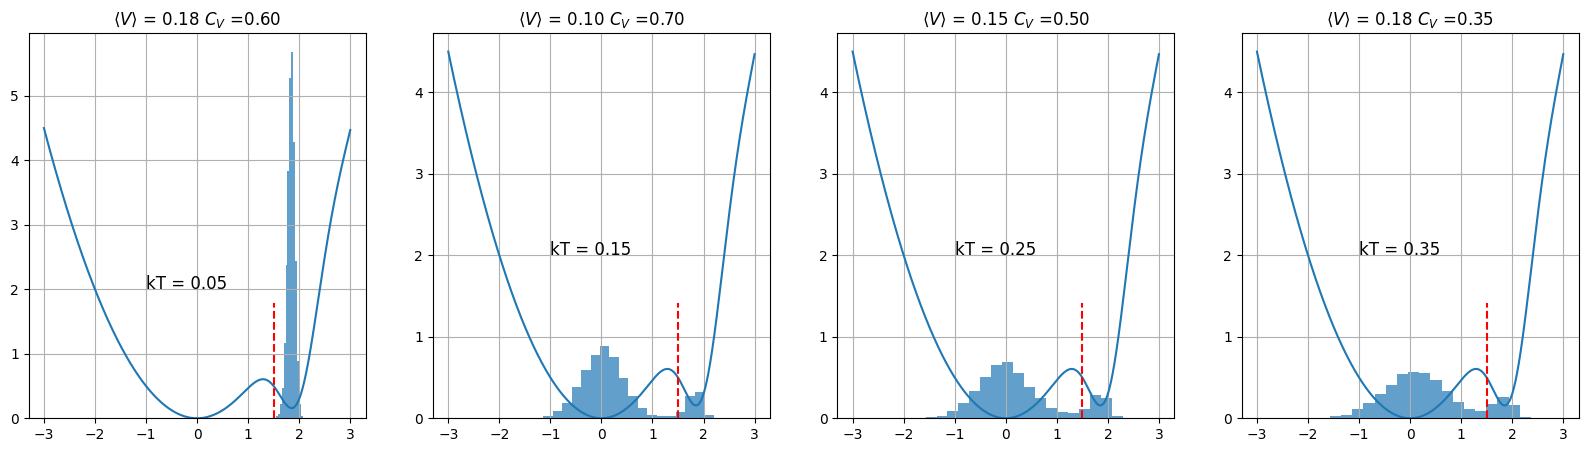

In [7]:
# Metropolis Monte Carlo

# Direct integration and Metropolis Monte Carlo to evaluate the thermally averaged potential energy

#This time, start in the other well

kTs = [0.05, 0.15, 0.25, 0.35]



Custom_Potentials = [CustomPotential(x0 = 0, x1 = 2, A = -1.7, B = 1/2, x_range=[-3,3], kT = kT, N_bins=60) for kT in kTs]

fig, axs = plt.subplots(1,4, figsize = (20,5))

for potential, ax, kT in zip(Custom_Potentials, axs, kTs):
    potential.plot_V(ax)
    #potential.plot_P(ax)
    print(f'kT = {kT}:')
    ax.axvline(1.5, ymax=0.3, color='red', ls='--', label='x0')
    xs, V_avg, C_V = potential.constant_temp_MD_1d(x0 = 1.5, N = 10000, m=1, dt=0.01)
    hist, bins = np.histogram(xs, bins=20, density=True)
    bin_centers = (bins[:-1] + bins[1:])/2
    bar_width = bins[1] - bins[0]
    ax.bar(bin_centers, hist, width = bar_width, alpha=0.7)
    ax.set_title(r'$\langle V \rangle$ = ' + f'{V_avg:.2f} ' + r'$C_V$ =' +f'{C_V:.2f}')
    ax.text(-1, 2, f'kT = {kT}', fontsize=12)
    ax.grid()
    
    


save_plot(fig,'CustomPotential, Varying T, MD, x = x1.png')